# Project no.2 - CIFAR10 Clustering

## Loading the data 

In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


### Since we are going to performe clustering, then we do not need to split the data into train and test.
let's concatenate them 

In [3]:
X = np.concatenate((x_train, x_test), axis = 0)
Y = np.squeeze(np.concatenate((y_train, y_test), axis = 0))

print("shape of the X and Y, respectively:")
print(X.shape, Y.shape)

shape of the X and Y, respectively:
(60000, 32, 32, 3) (60000,)


### Based on the project instruction, we should pick only 3 classes fro CIFAR10 dataset (which include 10 classes)
So let's randomally select 3 classes: 2,5,7 which represents bird, dog, and horse.
Aditionally, changing the classes from 2,5,7 to 0,1,2, respectively.

In [4]:

X_c2 = X[Y == 2]
X_c5 = X[Y == 5]
X_c7 = X[Y == 7]

X3c = np.concatenate((X_c2, X_c5, X_c7), axis = 0) #stands for X of three classes
Y3c = np.array([0]*X_c2.shape[0] + [1]*X_c5.shape[0] + [2] * X_c7.shape[0])
print("Shape of X3c: ", X3c.shape, "\nShape of Y3c: ", len(Y3c))

Shape of X3c:  (18000, 32, 32, 3) 
Shape of Y3c:  18000


In [7]:
print("Let's check how many we have from each class:")
print("Class 0: ",X_c2.shape[0])
print("Class 1: ",X_c5.shape[0])
print("Class 2: ",X_c7.shape[0])
print("As we can see our data is balanced.")

Let's check how many we have from each class:
Class 0:  6000
Class 1:  6000
Class 2:  6000
As we can see our data is balanced.


### Let's look over some pictures from each class


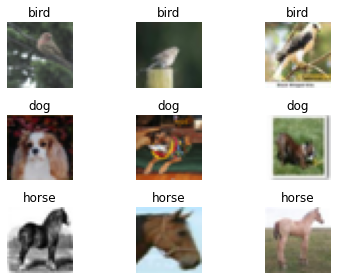

In [7]:
class_names = [ 'bird', 'dog', 'horse']

fig, axes = plt.subplots(3,3)
for i in range(3):
    X_class = X3c[Y3c == i]
    for j in range(3):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title(class_names[i])
        axes[i,j].axis('off')

fig.tight_layout()

## Clustering into 3 diffenret clusters:

### 1) Technique num.1:  without dimentionality reduction 

In order to apply clustering techniques over the data we should reshape our data into a vectors. Means, from (32,32,3) tensor into (32x32x3,1) vector (column vector of 3072 features) 

In [8]:
X3c_transformed = X3c.reshape(len(X3c),32*32*3)
print("New shape:", X3c_transformed.shape)

New shape: (18000, 3072)


Before we apply any kind of clustering technique, we should look what are the values we are dealing with at each dimention.


In [9]:
print("Max value for each dimention:", np.max(X3c_transformed, axis = 0))
print("Min value for each dimention: ", np.min(X3c_transformed, axis = 0))

Max value for each dimention: [255 255 255 ... 255 255 255]
Min value for each dimention:  [0 0 0 ... 0 0 0]


As we can see our values are in the range of 0-255. Since we are dealing with distances computation it is better to work on smaller values, then let's normalize our values to be in the range of 0 and 1.

In [10]:
max_vec =  np.max(X3c_transformed, axis = 0)
min_vec = np.min(X3c_transformed, axis = 0)
X3c_transformed_normelized = ((X3c_transformed -  min_vec)/ (max_vec - min_vec)) 
print("Max value of X3c_transformed_normelized: ", np.max(X3c_transformed_normelized))
print("Min value of X3c_transformed_normelized: ", np.min(X3c_transformed_normelized))


Max value of X3c_transformed_normelized:  1.0
Min value of X3c_transformed_normelized:  0.0


### 1.1) K-Means Method

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans  = KMeans(n_clusters = 3,verbose = 1, max_iter=500, tol=0.000001)
# Train the model:
kmeans.fit(X3c_transformed_normelized) 

Initialization complete
Iteration 0, inertia 3564039.9827450966
Iteration 1, inertia 2684317.0796431913
Iteration 2, inertia 2619859.779831985
Iteration 3, inertia 2590102.940579263
Iteration 4, inertia 2574404.43731704
Iteration 5, inertia 2565190.759654031
Iteration 6, inertia 2559471.2813178715
Iteration 7, inertia 2555835.7373440973
Iteration 8, inertia 2553075.2397420127
Iteration 9, inertia 2550885.7580204383
Iteration 10, inertia 2549315.8878719434
Iteration 11, inertia 2548400.364729706
Iteration 12, inertia 2547771.251528676
Iteration 13, inertia 2547298.9665988674
Iteration 14, inertia 2546872.719441029
Iteration 15, inertia 2546476.820666111
Iteration 16, inertia 2546115.76940157
Iteration 17, inertia 2545814.239912176
Iteration 18, inertia 2545488.6940215067
Iteration 19, inertia 2545192.74667622
Iteration 20, inertia 2544886.465640229
Iteration 21, inertia 2544532.1325615044
Iteration 22, inertia 2544154.301765667
Iteration 23, inertia 2543865.4470267682
Iteration 24, iner

Iteration 55, inertia 2536389.571061304
Iteration 56, inertia 2536383.0301807187
Iteration 57, inertia 2536375.3391456436
Iteration 58, inertia 2536370.0950015886
Iteration 59, inertia 2536366.800361721
Iteration 60, inertia 2536365.303252454
Iteration 61, inertia 2536363.4120954885
Iteration 62, inertia 2536360.8373594056
Iteration 63, inertia 2536358.194302037
Iteration 64, inertia 2536355.1348861703
Iteration 65, inertia 2536351.5376525484
Iteration 66, inertia 2536349.5148390867
Iteration 67, inertia 2536347.4583087764
Iteration 68, inertia 2536345.766790447
Iteration 69, inertia 2536344.2129070284
Iteration 70, inertia 2536343.1650074124
Iteration 71, inertia 2536342.573421843
Iteration 72, inertia 2536341.9953717776
Iteration 73, inertia 2536341.285204883
Iteration 74, inertia 2536340.5403313297
Iteration 75, inertia 2536339.6766555654
Iteration 76, inertia 2536339.5034254375
Iteration 77, inertia 2536339.4692300227
Converged at iteration 77: strict convergence.
Initialization co

Iteration 67, inertia 2537096.879350531
Iteration 68, inertia 2536996.468193052
Iteration 69, inertia 2536903.73896547
Iteration 70, inertia 2536828.965083222
Iteration 71, inertia 2536765.349383797
Iteration 72, inertia 2536694.8789908662
Iteration 73, inertia 2536657.482622771
Iteration 74, inertia 2536624.5239768736
Iteration 75, inertia 2536602.373729757
Iteration 76, inertia 2536563.063844671
Iteration 77, inertia 2536517.906911564
Iteration 78, inertia 2536489.707930343
Iteration 79, inertia 2536470.641237756
Iteration 80, inertia 2536459.336511796
Iteration 81, inertia 2536450.684196351
Iteration 82, inertia 2536442.01103297
Iteration 83, inertia 2536432.0180105
Iteration 84, inertia 2536414.7622513557
Iteration 85, inertia 2536405.5876582987
Iteration 86, inertia 2536396.9556736695
Iteration 87, inertia 2536389.5710613043
Iteration 88, inertia 2536383.0301807187
Iteration 89, inertia 2536375.3391456436
Iteration 90, inertia 2536370.0950015886
Iteration 91, inertia 2536366.80036

Iteration 27, inertia 2540649.729696968
Iteration 28, inertia 2540514.432909603
Iteration 29, inertia 2540407.770593951
Iteration 30, inertia 2540300.5034036892
Iteration 31, inertia 2540203.399723401
Iteration 32, inertia 2540104.232283804
Iteration 33, inertia 2540025.23695585
Iteration 34, inertia 2539967.9605760584
Iteration 35, inertia 2539913.7418809426
Iteration 36, inertia 2539856.0588819645
Iteration 37, inertia 2539785.5696314718
Iteration 38, inertia 2539710.963191754
Iteration 39, inertia 2539629.7215118133
Iteration 40, inertia 2539536.1173207248
Iteration 41, inertia 2539421.9501847536
Iteration 42, inertia 2539272.2219382785
Iteration 43, inertia 2539092.2411827985
Iteration 44, inertia 2538963.1470249346
Iteration 45, inertia 2538841.045101883
Iteration 46, inertia 2538740.2519549537
Iteration 47, inertia 2538641.2683062754
Iteration 48, inertia 2538550.2430175934
Iteration 49, inertia 2538452.568041234
Iteration 50, inertia 2538378.4519254086
Iteration 51, inertia 2538

Initialization complete
Iteration 0, inertia 4366798.909634754
Iteration 1, inertia 2630099.728556528
Iteration 2, inertia 2571462.1788128414
Iteration 3, inertia 2557543.17168045
Iteration 4, inertia 2551269.3030501804
Iteration 5, inertia 2547130.5882785507
Iteration 6, inertia 2543891.6563996417
Iteration 7, inertia 2541616.908017358
Iteration 8, inertia 2540134.8097513816
Iteration 9, inertia 2539244.73824208
Iteration 10, inertia 2538548.498813005
Iteration 11, inertia 2538071.899178616
Iteration 12, inertia 2537719.240528662
Iteration 13, inertia 2537427.3926515006
Iteration 14, inertia 2537195.7050341563
Iteration 15, inertia 2537012.7199146803
Iteration 16, inertia 2536843.9985605953
Iteration 17, inertia 2536705.102019828
Iteration 18, inertia 2536597.6729996987
Iteration 19, inertia 2536515.007641901
Iteration 20, inertia 2536441.545063559
Iteration 21, inertia 2536389.830922151
Iteration 22, inertia 2536362.0298081003
Iteration 23, inertia 2536337.84658909
Iteration 24, iner

KMeans(max_iter=500, n_clusters=3, tol=1e-06, verbose=1)

Let's check the quality of KMeans clustering technique by checking its Silhouette score and Davies-Bounding index

In [11]:
from sklearn import metrics 
Y_clustered = kmeans.labels_

# Silhouette Score (The average of all the points)
#Close to 1 -> Good assignment of a point to its cluster
#Close to 0 -> Assignment of a point to the borderline of two clusters
#Close to -1 -> Bad assignment of a point to its cluster

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", metrics.silhouette_score(X3c_transformed_normelized, Y_clustered)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_transformed_normelized, Y_clustered)) 


Silhouette Score (mean Silhouette Coefficient over all samples):  0.0886340368464252
Davies-Bounding index:  2.6310517601324546


#### Explanation:
Let's try to explain what was the main feature on which KMeans methods based its clustering.
In order to do that, let's check some images from each cluster. 

In [12]:
Y_clustered 

array([1, 0, 1, ..., 1, 1, 1])

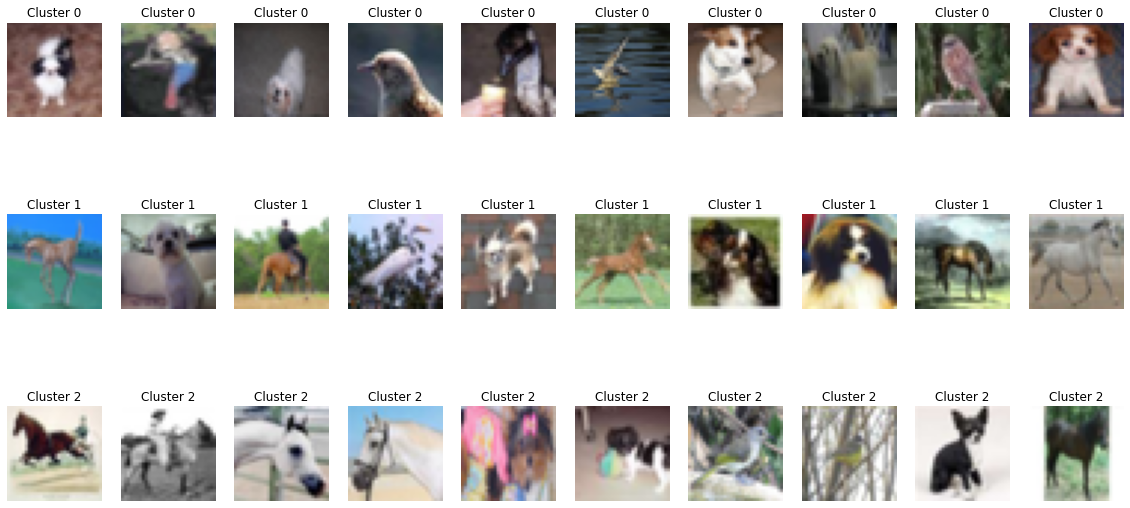

In [13]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c[Y_clustered  == i]
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

On the one hand, as it can be seen from the images above, it is hard to understand only by looking at what was the feature KMeans based on when it performed clustering. But on the other hand, one can claim that KMeans based its clustering on the image lightness. In order to check that, let's compare the average lightness of each cluster!

In [14]:
from skimage import io, color
lab0 = color.rgb2lab(X3c[Y_clustered == 0])
lab1 = color.rgb2lab(X3c[Y_clustered == 1])
lab2 = color.rgb2lab(X3c[Y_clustered == 2])

In [15]:
sum(Y_clustered == 2)

3584

In [16]:
print("Average lightness of cluster 0: ","Average Value: ",np.round(np.mean(lab0[:,:,:,0])),
      " Min Value: ", np.round(np.min(np.mean(lab0[:,:,:,0], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(lab0[:,:,:,0], axis = 0))),", Num of images in the set: ", len(lab0[:,:,:,0]),
      "\n#Birds:" , sum(Y3c[Y_clustered==0]==0)," #Dog:" , sum(Y3c[Y_clustered==0]==1) , " #horse:", sum(Y3c[Y_clustered==0]==2),
"\nAverage lightness of cluster 1: ", "Average Value: ", np.round(np.mean(lab1[:,:,:,0])),
      " Min Value: " ,np.round(np.min(np.mean(lab1[:,:,:,0], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(lab1[:,:,:,0], axis = 0))), ", Num of images in the set: ", len(lab1[:,:,:,0]),
      "\n#Birds:" , sum(Y3c[Y_clustered==1]==0)," #Dog:" , sum(Y3c[Y_clustered==1]==1) , " #horse:", sum(Y3c[Y_clustered==1]==2),
"\nAverage lightness of cluster 2: ", "Average Value: " ,np.round(np.mean(lab2[:,:,:,0]))
      ," Min Value: ", np.round(np.min(np.mean(lab2[:,:,:,0], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(lab2[:,:,:,0], axis = 0))), ", Num of images in the set: ", len(lab2[:,:,:,0]),
     "\n#Birds:" , sum(Y3c[Y_clustered==2]==0)," #Dog:" , sum(Y3c[Y_clustered==2]==1) , " #horse:", sum(Y3c[Y_clustered==2]==2))

Average lightness of cluster 0:  Average Value:  41.0  Min Value:  29.0 Max Value:  50.0 , Num of images in the set:  6766 
#Birds: 2091  #Dog: 2814  #horse: 1861 
Average lightness of cluster 1:  Average Value:  52.0  Min Value:  41.0 Max Value:  64.0 , Num of images in the set:  7650 
#Birds: 2440  #Dog: 2101  #horse: 3109 
Average lightness of cluster 2:  Average Value:  67.0  Min Value:  49.0 Max Value:  75.0 , Num of images in the set:  3584 
#Birds: 1469  #Dog: 1085  #horse: 1030


As we can see, it is indeed possible that the clustering performed by Kmeans considers lightness as one of its main clustering features.

### 1.2) Hierarchical Clustering (HC) Method

In [17]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3 ,affinity= 'euclidean') #Hierarchical Clustering

# Train the model:
hc.fit(X3c_transformed_normelized)


AgglomerativeClustering(n_clusters=3)

In [18]:
Y_hc = hc.labels_
print(np.unique(Y_hc))

[0 1 2]


#### Let's check the quality of Hierarchical Clustering technique by checking its Silhouette score and Davies-Bounding index

In [19]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_transformed_normelized,Y_hc)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_transformed_normelized, Y_hc)) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.054540568002621324
Davies-Bounding index:  2.8100133362681476


#### Explanation:
Let's try to explain what was the main feature on which HC method based its clustering.
In order to do that, let's check some images from each cluster. 

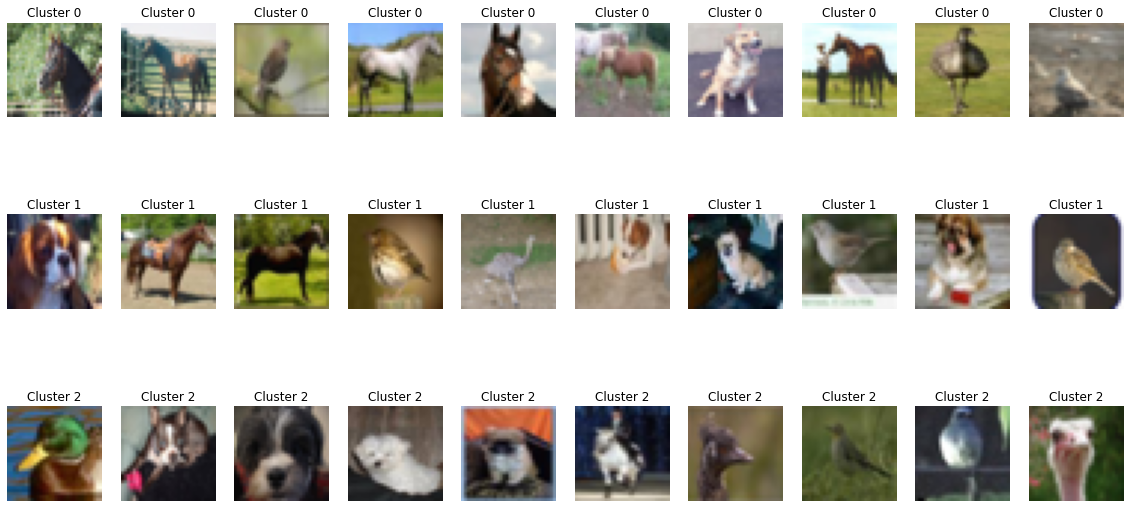

In [20]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c[Y_hc  == i]
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

Based on the images presented above, it is hard to tell which features HC method was based on when classifying the images into three separate classes. But, by looking over the brightness of the images we can see that they differ one from another. So in order to check that let's take a look over the average value of the image's brightness of each class.

In [21]:
def rgb2gray(rgbSet):
    images = []
    for i in range(len(rgbSet)):
        img = rgbSet[i,...]
        grayImage = rgb2gray_1(img)
        images.append(grayImage)
        
    return np.array(images)

def rgb2gray_1(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray



In [22]:
g0 = rgb2gray(X3c[Y_hc == 0])
g1 = rgb2gray(X3c[Y_hc == 1])
g2 = rgb2gray(X3c[Y_hc == 2])

In [23]:
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(g0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(g0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(g0[:,:,:], axis = 0))),", Num of images in the set: ", len(g0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_hc==0]==0)," #Dog:" , sum(Y3c[Y_hc==0]==1) , " #horse:", sum(Y3c[Y_hc==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(g1[:,:,:])),
      " Min Value: " ,np.round(np.min(np.mean(g1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(g1[:,:,:], axis = 0))), ", Num of images in the set: ", len(g1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_hc==1]==0)," #Dog:" , sum(Y3c[Y_hc==1]==1) , " #horse:", sum(Y3c[Y_hc==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(g2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(g2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(g2[:,:,:], axis = 0))), ", Num of images in the set: ", len(g2[:,:,:]),
     "\n#Birds:" , sum(Y3c[Y_hc==2]==0)," #Dog:" , sum(Y3c[Y_hc==2]==1) , " #horse:", sum(Y3c[Y_hc==2]==2))

Average brightness of cluster 0:  Average Value:  142.0  Min Value:  102.0 Max Value:  177.0 , Num of images in the set:  7994 
#Birds: 2991  #Dog: 2024  #horse: 2979 
Average brightness of cluster 1:  Average Value:  114.0  Min Value:  92.0 Max Value:  127.0 , Num of images in the set:  7725 
#Birds: 2036  #Dog: 3192  #horse: 2497 
Average brightness of cluster 2:  Average Value:  78.0  Min Value:  57.0 Max Value:  108.0 , Num of images in the set:  2281 
#Birds: 973  #Dog: 784  #horse: 524


As we can see, it is indeed possible that the clustering performed by HC considers brightness as one of its main clustering features.

### 1.3) Gaussians Mixture (GM) Method 

In [24]:
from sklearn import mixture
gm = mixture.GaussianMixture(n_components= 3, covariance_type='full', tol=0.001, reg_covar=1e-06,
                                    max_iter=100, n_init=1, init_params='kmeans',
                                    verbose= 1, verbose_interval=10)
# Train the model:
gm.fit(X3c_transformed_normelized)


Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True


GaussianMixture(n_components=3, verbose=1)

In [25]:
# Use the model:
Y_gm = gm.predict(X3c_transformed_normelized)
print(np.unique(Y_gm))

[0 1 2]


Let's check the quality of Gaussians Mizture technique by checking its Silhouette score and Davies-Bounding index

In [26]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_transformed_normelized,Y_gm)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_transformed_normelized, Y_gm)) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.07552746934935747
Davies-Bounding index:  2.848379622589949


#### Explanation:
Let's try to explain what was the main feature on which GM method based its clustering.
In order to do that, let's check some images from each cluster. 

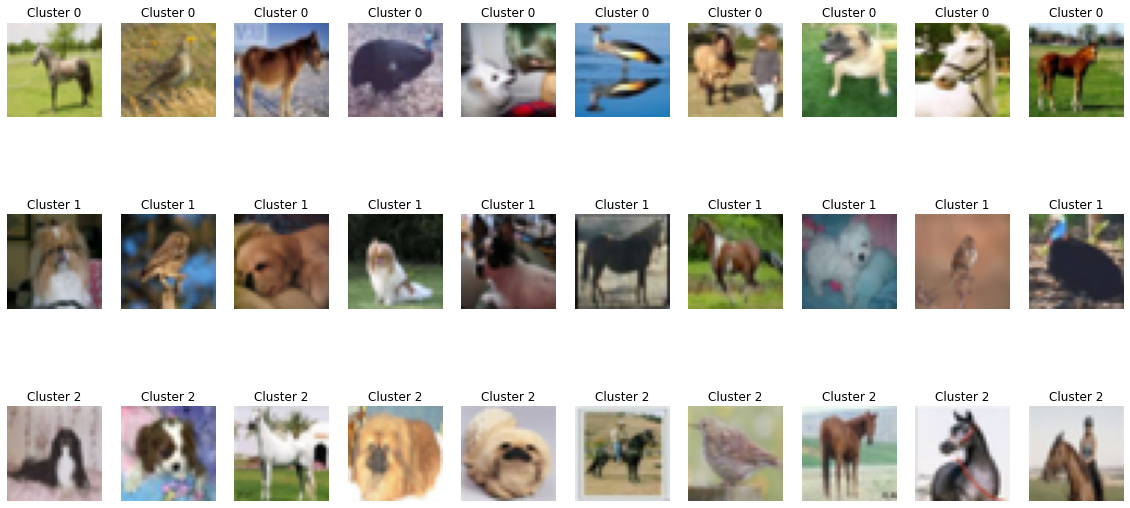

In [27]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c[Y_gm  == i]
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

Based on the images presented above, it is hard to tell which features GM method was based on when classifying the images into three separate classes. But, by looking over the brightness of the images we can see that they differ one from another. So in order to check that let's take a look over the average value of the image's brightness of each class.

In [28]:
gm0 = rgb2gray(X3c[Y_gm == 0])
gm1 = rgb2gray(X3c[Y_gm == 1])
gm2 = rgb2gray(X3c[Y_gm == 2])

In [29]:
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(gm0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(gm0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm0[:,:,:], axis = 0))),", Num of images in the set: ", len(gm0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gm==0]==0)," #Dog:" , sum(Y3c[Y_gm==0]==1) , " #horse:", sum(Y3c[Y_gm==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(gm1[:,:,:])),
      " Min Value: " ,np.round(np.min(np.mean(gm1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(gm1[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gm==1]==0)," #Dog:" , sum(Y3c[Y_gm==1]==1) , " #horse:", sum(Y3c[Y_gm==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(gm2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(gm2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm2[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm2[:,:,:]),
     "\n#Birds:" , sum(Y3c[Y_gm==2]==0)," #Dog:" , sum(Y3c[Y_gm==2]==1) , " #horse:", sum(Y3c[Y_gm==2]==2))

Average brightness of cluster 0:  Average Value:  125.0  Min Value:  99.0 Max Value:  154.0 , Num of images in the set:  7135 
#Birds: 2129  #Dog: 1947  #horse: 3059 
Average brightness of cluster 1:  Average Value:  99.0  Min Value:  73.0 Max Value:  120.0 , Num of images in the set:  7225 
#Birds: 2373  #Dog: 2947  #horse: 1905 
Average brightness of cluster 2:  Average Value:  162.0  Min Value:  118.0 Max Value:  184.0 , Num of images in the set:  3640 
#Birds: 1498  #Dog: 1106  #horse: 1036


It indeed looks like image brightness has an impact on the image clustering procedure.

### Part 1 Results, Discussion and Conclusion:

#### Results:
1) KMeans - Silhouette Score (mean Silhouette Coefficient over all samples):  0.089, Davies-Bounding index:  2.63 - explained by lightness

2) HC - Silhouette Score (mean Silhouette Coefficient over all samples):  0.055, Davies-Bounding index:  2.81 - explained by brightness

3) GM - Silhouette Score (mean Silhouette Coefficient over all samples):  0.076, Davies-Bounding index:  2.85 - explained by brightness

#### Discussion:
By looking over the results of all three clustering methods in a visual way, we can see that the clustering methods did not cluster the images based on the animal presented. Additionally, it was shown that lightness and brightness were played as major features during the clustering procedure of all three methods. The Silhouette coefficient of all three examined clustering methods was found to have the same order magnitude of 0.01, which means that the clusters are indifferent, or we can say that the distance between clusters is not significant. Davies-Bounding index, based on euclidian distance in our calculation, presents values in order of magnitude of units, around 3, which means that all three methods yield more or less the same similarity measure of each cluster with its most similar cluster. 

#### Conclusion:
We can conclude that without dimensionality reduction/pre-processing image clustering will tend to cluster based on image properties and not on the object inside the image. Additionally, we can conclude that there is no preferred technique in our examination scenario.
We can conclude that without dimensionality reduction/pre-processing image clustering will tend to cluster based on image properties and not on the object inside the image. Additionally, we can conclude that there is no preferred technique in our examination scenario.

### 2) Technique num.2:  Clustering combined with Dimentionality reduction  

#### 2.1) PCA followed by all three clusstering methods 


First, let's check how many dimentions we need to cover 90% of the data information 

In [30]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X3c_transformed_normelized)
Eigenvalues = pca.singular_values_

cum_sum = 0
cum_sum_info = []
Index = 0
total_sum = np.sum(Eigenvalues)
for i in range(len(Eigenvalues)):
    cum_sum += Eigenvalues[i]
    cum_sum_info.append(cum_sum/total_sum * 100)
    if cum_sum/total_sum >= 0.90 and Index == 0:
        Index = i
        print("Num of features to cover %.2f %%  of the data information is %i, out of %i possible features, which is  %.2f %% of the possible features!"
              %(cum_sum/total_sum*100,Index, len(Eigenvalues), Index/len(Eigenvalues)*100) )
    


Num of features to cover 90.01 %  of the data information is 1101, out of 3072 possible features, which is  35.84 % of the possible features!


The black point presents the required number of dimensions to ensure at least 90% of data information. This means we can present 90% of the information by using only 1101 dimensions in comparison to the original image dimension, which is 3072. 


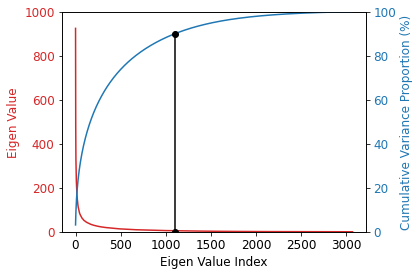

In [31]:
import matplotlib 
matplotlib.rcParams.update({'font.size': 12})
t = np.arange(len(Eigenvalues))
data1 = Eigenvalues
data2 = cum_sum_info

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Eigen Value Index')
ax1.set_ylabel('Eigen Value', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,1000])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cumulative Variance Proportion (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot([Index,Index], [0,90], '-ok')
ax2.set_ylim([0,100])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
print("The black point presents the required number of dimensions to ensure at least 90%% of data information. This means we can present 90%% of the information by using only %d dimensions in comparison to the original image dimension, which is %d. "
      %(Index,len(Eigenvalues))) 

Now, before we continue to examine what dimensionality reduction will do to all three clustering methods.
let's take a look over the two main dimensions of the data (based on $V_{1}$ and $V_{2}$, where $V_{i}$'s are the eigenvectors of the highest eigenvalues). The mathematical equation can be written as 
$$X_{proj} = Proj_{x}{V}$$
where 
$$V = [\vec{V}_{1}, \vec{V}_{2}] \ | \  \vec{V_i} \in \mathbb{R}^{3072}$$ s.t $$\lambda_{1} \geq \lambda_{2} \geq ... \geq \lambda_{3072}$$
and 
$$x = [x_1, ..., x_{3072}]$$


In [32]:

V = pca.components_[:2,:]
X_proj = np.matmul(X3c_transformed_normelized, V.T)
print(np.shape(X_proj))


(18000, 2)


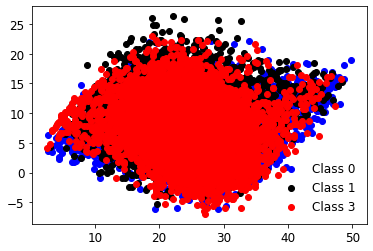

In [33]:

plt.scatter(X_proj[Y3c==0][:,0], X_proj[Y3c==0][:,1], color = 'b' , label = 'Class 0')
plt.scatter(X_proj[Y3c==1][:,0], X_proj[Y3c==1][:,1], color = 'k', label= 'Class 1' )
plt.scatter(X_proj[Y3c==2][:,0], X_proj[Y3c==2][:,1], color = 'r' ,label = 'Class 3')
plt.legend(frameon = False)

As we can see all three classes were placed in the same area, which means that same as before, it is more likely that the clustering methods will cluster the data based on the image properties (e.g., brightness, and lightness) and not based on the object in the image (the animal kind).

#### 2.1) PCA followed by all three clusstering methods 

In [34]:
# let's project the data over 1101 dimensions (covering 90% of the data information)
X3c_transformed_normelized_projected = np.matmul(X3c_transformed_normelized,pca.components_[:1101,:].T )
print("Shape of Xproj:", np.shape(X3c_transformed_normelized_projected))

Shape of Xproj: (18000, 1101)


#### 2.1.1) K-Means Method + PCA

In [35]:
kmeansPca  = KMeans(n_clusters = 3,verbose = 1, max_iter=500, tol=0.000001)
# Train the model:
kmeansPca.fit(X3c_transformed_normelized_projected) 

Initialization complete
Iteration 0, inertia 4895929.846925839
Iteration 1, inertia 2679374.275409846
Iteration 2, inertia 2600683.389240171
Iteration 3, inertia 2566732.3354095267
Iteration 4, inertia 2546881.237906774
Iteration 5, inertia 2537085.422365864
Iteration 6, inertia 2532605.6119976006
Iteration 7, inertia 2530827.6212351606
Iteration 8, inertia 2530043.431251835
Iteration 9, inertia 2529619.1550567313
Iteration 10, inertia 2529366.5500502763
Iteration 11, inertia 2529204.7712812554
Iteration 12, inertia 2529092.450583971
Iteration 13, inertia 2528988.9369536014
Iteration 14, inertia 2528919.251439505
Iteration 15, inertia 2528880.041376781
Iteration 16, inertia 2528851.5938001773
Iteration 17, inertia 2528834.9319433593
Iteration 18, inertia 2528825.2004330126
Iteration 19, inertia 2528820.1987272864
Iteration 20, inertia 2528816.459586411
Iteration 21, inertia 2528814.132194491
Iteration 22, inertia 2528813.352500788
Iteration 23, inertia 2528812.966247353
Iteration 24, i

Iteration 6, inertia 2543786.441938693
Iteration 7, inertia 2541808.1927841567
Iteration 8, inertia 2540827.2200242355
Iteration 9, inertia 2540155.973275292
Iteration 10, inertia 2539638.008255623
Iteration 11, inertia 2539167.810707282
Iteration 12, inertia 2538778.3201185474
Iteration 13, inertia 2538444.0768074687
Iteration 14, inertia 2538112.732601675
Iteration 15, inertia 2537799.5423435625
Iteration 16, inertia 2537511.538394693
Iteration 17, inertia 2537173.2747944146
Iteration 18, inertia 2536779.693000517
Iteration 19, inertia 2536455.730639099
Iteration 20, inertia 2536180.0576540995
Iteration 21, inertia 2535932.586778548
Iteration 22, inertia 2535660.428751666
Iteration 23, inertia 2535383.7053842167
Iteration 24, inertia 2535119.222804802
Iteration 25, inertia 2534851.3166873455
Iteration 26, inertia 2534592.018922281
Iteration 27, inertia 2534363.4596149847
Iteration 28, inertia 2534136.02808315
Iteration 29, inertia 2533924.8968023565
Iteration 30, inertia 2533739.6053

Iteration 77, inertia 2528975.77131802
Iteration 78, inertia 2528965.006878803
Iteration 79, inertia 2528955.183071811
Iteration 80, inertia 2528945.353360052
Iteration 81, inertia 2528928.478419291
Iteration 82, inertia 2528918.97222969
Iteration 83, inertia 2528910.4004167193
Iteration 84, inertia 2528902.346266035
Iteration 85, inertia 2528895.2759664375
Iteration 86, inertia 2528887.5418059765
Iteration 87, inertia 2528882.4676149464
Iteration 88, inertia 2528879.1743679033
Iteration 89, inertia 2528877.6768531348
Iteration 90, inertia 2528875.7878443934
Iteration 91, inertia 2528873.212195727
Iteration 92, inertia 2528870.568866857
Iteration 93, inertia 2528867.5070230993
Iteration 94, inertia 2528863.9134356533
Iteration 95, inertia 2528861.8870986262
Iteration 96, inertia 2528859.8274020464
Iteration 97, inertia 2528858.136839291
Iteration 98, inertia 2528856.5834689075
Iteration 99, inertia 2528855.536846772
Iteration 100, inertia 2528854.9450702714
Iteration 101, inertia 25288

Iteration 96, inertia 2528882.4676149464
Iteration 97, inertia 2528879.1743679033
Iteration 98, inertia 2528877.6768531348
Iteration 99, inertia 2528875.7878443934
Iteration 100, inertia 2528873.212195727
Iteration 101, inertia 2528870.568866857
Iteration 102, inertia 2528867.5070230993
Iteration 103, inertia 2528863.9134356533
Iteration 104, inertia 2528861.8870986262
Iteration 105, inertia 2528859.8274020464
Iteration 106, inertia 2528858.136839291
Iteration 107, inertia 2528856.583468908
Iteration 108, inertia 2528855.536846772
Iteration 109, inertia 2528854.9450702714
Iteration 110, inertia 2528854.3660405194
Iteration 111, inertia 2528853.657542096
Iteration 112, inertia 2528852.913096277
Iteration 113, inertia 2528852.050847758
Iteration 114, inertia 2528851.8772690236
Iteration 115, inertia 2528851.84315938
Converged at iteration 115: strict convergence.


KMeans(max_iter=500, n_clusters=3, tol=1e-06, verbose=1)

Let's check the quality of PCA $\rightarrow$ KMeans clustering technique by checking its Silhouette score and Davies-Bounding index

In [36]:

Y_clustered_pca = kmeansPca.labels_

# Silhouette Score (The average of all the points)
#Close to 1 -> Good assignment of a point to its cluster
#Close to 0 -> Assignment of a point to the borderline of two clusters
#Close to -1 -> Bad assignment of a point to its cluster

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", metrics.silhouette_score(X3c_transformed_normelized_projected, Y_clustered_pca)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_transformed_normelized_projected, Y_clustered_pca)) 


Silhouette Score (mean Silhouette Coefficient over all samples):  0.0888613857475788
Davies-Bounding index:  2.6267264196088185


#### Explanation:
Let's try to explain what was the main feature on which KMeans methods based its clustering.
In order to do that, let's check some images from each cluster. 

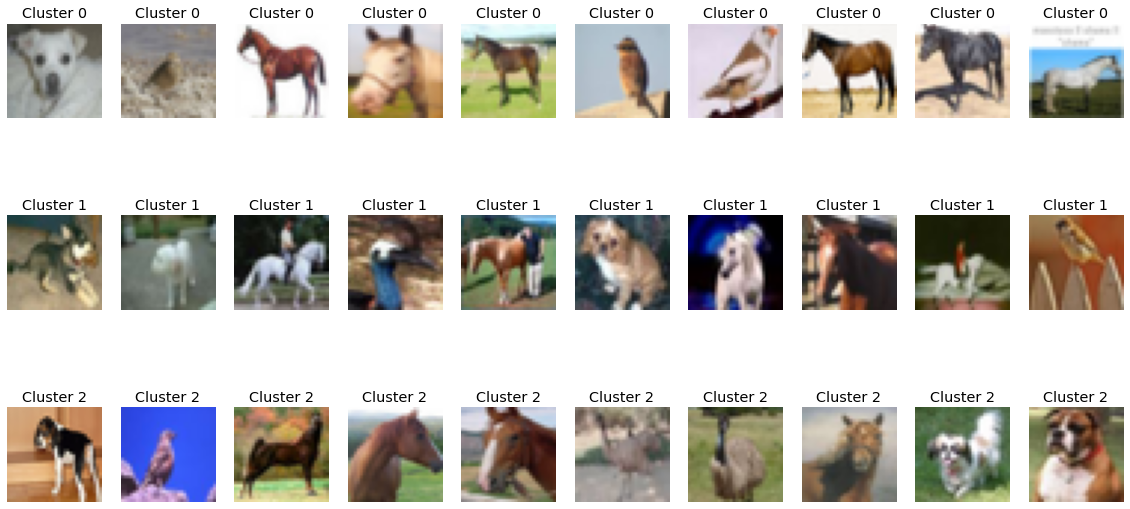

In [37]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c[Y_clustered_pca  == i]
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

In [38]:
from skimage import io, color
lab0 = color.rgb2lab(X3c[Y_clustered_pca == 0])
lab1 = color.rgb2lab(X3c[Y_clustered_pca == 1])
lab2 = color.rgb2lab(X3c[Y_clustered_pca == 2])

In [39]:
print("Average lightness of cluster 0: ","Average Value: ",np.round(np.mean(lab0[:,:,:,0])),
      " Min Value: ", np.round(np.min(np.mean(lab0[:,:,:,0], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(lab0[:,:,:,0], axis = 0))),", Num of images in the set: ", len(lab0[:,:,:,0]),
      "\n#Birds:" , sum(Y3c[Y_clustered_pca==0]==0)," #Dog:" , sum(Y3c[Y_clustered_pca==0]==1) , " #horse:", sum(Y3c[Y_clustered_pca==0]==2),
"\nAverage lightness of cluster 1: ", "Average Value: ", np.round(np.mean(lab1[:,:,:,0])),
      " Min Value: " ,np.round(np.min(np.mean(lab1[:,:,:,0], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(lab1[:,:,:,0], axis = 0))), ", Num of images in the set: ", len(lab1[:,:,:,0]),
      "\n#Birds:" , sum(Y3c[Y_clustered_pca==1]==0)," #Dog:" , sum(Y3c[Y_clustered_pca==1]==1) , " #horse:", sum(Y3c[Y_clustered_pca==1]==2),
"\nAverage lightness of cluster 2: ", "Average Value: " ,np.round(np.mean(lab2[:,:,:,0]))
      ," Min Value: ", np.round(np.min(np.mean(lab2[:,:,:,0], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(lab2[:,:,:,0], axis = 0))), ", Num of images in the set: ", len(lab2[:,:,:,0]),
     "\n#Birds:" , sum(Y3c[Y_clustered_pca==2]==0)," #Dog:" , sum(Y3c[Y_clustered_pca==2]==1) , " #horse:", sum(Y3c[Y_clustered_pca==2]==2))

Average lightness of cluster 0:  Average Value:  67.0  Min Value:  49.0 Max Value:  75.0 , Num of images in the set:  3584 
#Birds: 1469  #Dog: 1085  #horse: 1030 
Average lightness of cluster 1:  Average Value:  41.0  Min Value:  29.0 Max Value:  50.0 , Num of images in the set:  6766 
#Birds: 2091  #Dog: 2814  #horse: 1861 
Average lightness of cluster 2:  Average Value:  52.0  Min Value:  41.0 Max Value:  64.0 , Num of images in the set:  7650 
#Birds: 2440  #Dog: 2101  #horse: 3109


Except for the fact that the examination of Kmeans algorithm was faster, nothing has changed dramatically.

#### 2.1.1) Hierarchical Clustering (HC) Method + PCA

In [40]:
hcPca = AgglomerativeClustering(n_clusters=3 ,affinity= 'euclidean') #Hierarchical Clustering

# Train the model:
hcPca.fit(X3c_transformed_normelized_projected)
Y_hc_Pca = hcPca.labels_
print(np.unique(Y_hc_Pca))


[0 1 2]


Let's check the quality of Hierarchical Clustering technique by checking its Silhouette score and Davies-Bounding index

In [41]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_transformed_normelized,Y_hc_Pca)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_transformed_normelized, Y_hc_Pca)) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.057864610188002805
Davies-Bounding index:  2.8268073193751566


#### Explanation:
Let's try to explain what was the main feature on which PCA$\rightarrow$HC method based its clustering.
In order to do that, let's check some images from each cluster. 

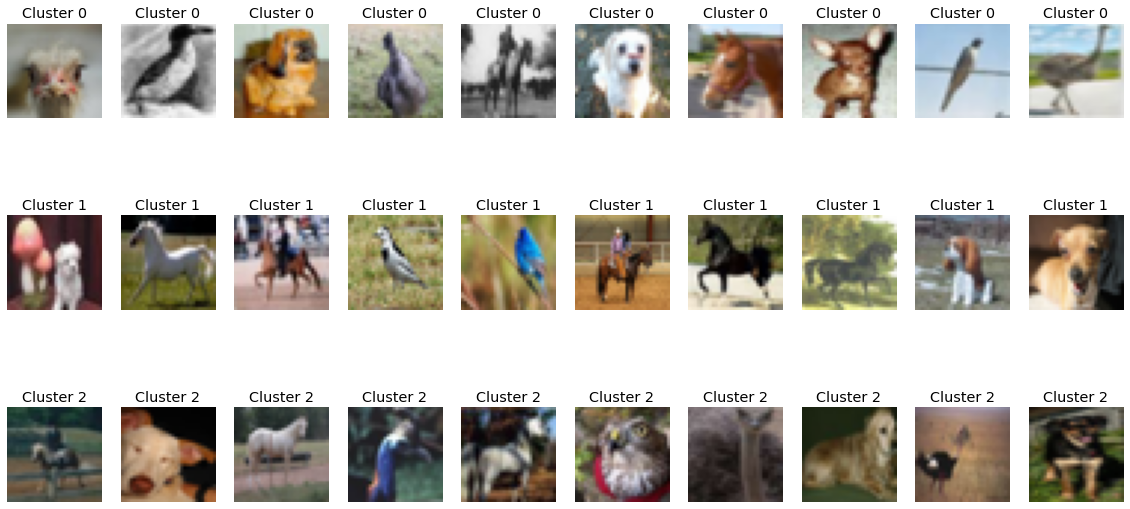

In [42]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c[Y_hc_Pca  == i]
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

In [43]:
g0 = rgb2gray(X3c[ Y_hc_Pca == 0])
g1 = rgb2gray(X3c[ Y_hc_Pca == 1])
g2 = rgb2gray(X3c[ Y_hc_Pca == 2])
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(g0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(g0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(g0[:,:,:], axis = 0))),", Num of images in the set: ", len(g0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_hc_Pca==0]==0)," #Dog:" , sum(Y3c[Y_hc_Pca==0]==1) , " #horse:", sum(Y3c[Y_hc_Pca==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(g1[:,:,:])),
      " Min Value: " ,np.round(np.min(np.mean(g1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(g1[:,:,:], axis = 0))), ", Num of images in the set: ", len(g1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_hc_Pca==1]==0)," #Dog:" , sum(Y3c[Y_hc_Pca==1]==1) , " #horse:", sum(Y3c[Y_hc_Pca==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(g2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(g2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(g2[:,:,:], axis = 0))), ", Num of images in the set: ", len(g2[:,:,:]),
     "\n#Birds:" , sum(Y3c[Y_hc_Pca==2]==0)," #Dog:" , sum(Y3c[Y_hc_Pca==2]==1) , " #horse:", sum(Y3c[Y_hc_Pca==2]==2))

Average brightness of cluster 0:  Average Value:  145.0  Min Value:  107.0 Max Value:  183.0 , Num of images in the set:  6661 
#Birds: 2358  #Dog: 1737  #horse: 2566 
Average brightness of cluster 1:  Average Value:  118.0  Min Value:  101.0 Max Value:  132.0 , Num of images in the set:  8258 
#Birds: 2406  #Dog: 3171  #horse: 2681 
Average brightness of cluster 2:  Average Value:  82.0  Min Value:  63.0 Max Value:  110.0 , Num of images in the set:  3081 
#Birds: 1236  #Dog: 1092  #horse: 753


Except for the fact that the examination of HC algorithm was faster due smaller data dimension, nothing has changed dramatically.

#### 2.1.3) Gaussians Mixture (GM) Method  + PCA

In [46]:

gmPca = mixture.GaussianMixture(n_components= 3, covariance_type='full', tol=0.001, reg_covar=1e-06,
                                    max_iter=100, n_init=1, init_params='kmeans',
                                    verbose= 1, verbose_interval=10)

gmPca.fit(X3c_transformed_normelized_projected)




Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
Initialization converged: True


GaussianMixture(n_components=3, verbose=1)

In [47]:
Y_gmPca = gmPca.predict(X3c_transformed_normelized_projected)
print(np.unique(Y_gmPca))

[0 1 2]


Let's check the quality of PCA $\rightarrow$ GM technique by checking its Silhouette score and Davies-Bounding index

In [48]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_transformed_normelized,Y_gmPca)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_transformed_normelized, Y_gmPca)) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.024879755167237873
Davies-Bounding index:  5.12950586879646


#### Explanation:
Let's try to explain what was the main feature on which GM method based its clustering.
In order to do that, let's check some images from each cluster. 

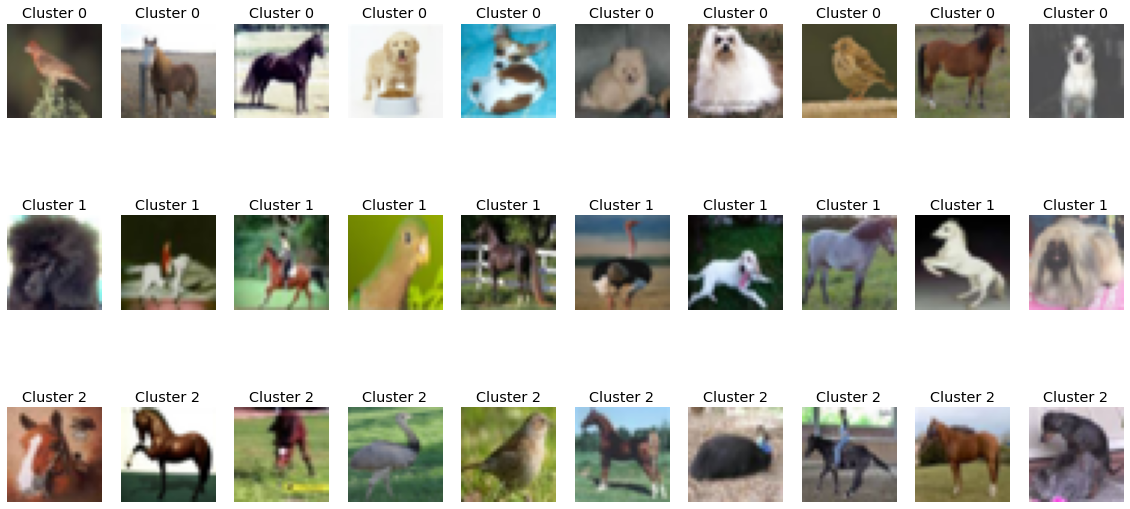

In [49]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c[Y_gmPca == i]
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

In [50]:
gm0 = rgb2gray(X3c[Y_gmPca == 0])
gm1 = rgb2gray(X3c[Y_gmPca == 1])
gm2 = rgb2gray(X3c[Y_gmPca == 2])
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(gm0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(gm0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm0[:,:,:], axis = 0))),", Num of images in the set: ", len(gm0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gmPca==0]==0)," #Dog:" , sum(Y3c[Y_gmPca==0]==1) , " #horse:", sum(Y3c[Y_gmPca==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(gm1[:,:,:])),
      
      " Min Value: " ,np.round(np.min(np.mean(gm1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(gm1[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gmPca==1]==0)," #Dog:" , sum(Y3c[Y_gmPca==1]==1) , " #horse:", sum(Y3c[Y_gmPca==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(gm2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(gm2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm2[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm2[:,:,:]),
     "\n#Birds:" , sum(Y3c[Y_gmPca==2]==0)," #Dog:" , sum(Y3c[Y_gmPca==2]==1) , " #horse:", sum(Y3c[Y_gmPca==2]==2))

Average brightness of cluster 0:  Average Value:  139.0  Min Value:  115.0 Max Value:  151.0 , Num of images in the set:  6174 
#Birds: 2717  #Dog: 2084  #horse: 1373 
Average brightness of cluster 1:  Average Value:  103.0  Min Value:  79.0 Max Value:  121.0 , Num of images in the set:  6319 
#Birds: 2008  #Dog: 2460  #horse: 1851 
Average brightness of cluster 2:  Average Value:  125.0  Min Value:  97.0 Max Value:  157.0 , Num of images in the set:  5507 
#Birds: 1275  #Dog: 1456  #horse: 2776


Same as previous results of using PCA, GM+PCA does not provide different results compared to GM without PCA.

#### 2.2) Auto-Encoder followed by all three clusstering methods 

The main motivation for using AutoEncoder is to provide dimensionality reduction in a sophisticated manner. Based on the idea behind the autoencoder, the features, after encoding, should provide details about the object in the image. In other words, the autoencoder followed by the clustering method should provide clustering based on the object presented in the image (bird, horse, and dog) and not on image specifications like brightness, contrast, and so on.

In [8]:
import tensorflow as tf 

In [9]:
# building the encoder model 
X3c_normelized = 2 * (X3c / 255.0) - 1 ## normelized the data to -1 .... +1 , shape (None, 32,32,3)

inputs_encoder = tf.keras.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(16, (3,3), strides=(2, 2), padding='SAME',activation=tf.nn.relu)(inputs_encoder) # 32x32x3 --> 16x16x16
x = tf.keras.layers.Conv2D(32, (3,3), strides=(2, 2), padding='SAME',activation=tf.nn.relu)(x) # 16x16x16 --> 8x8x32
x = tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='SAME',activation=tf.nn.relu)(x) # 8 x 8 x 32 --> 4x4x64
x = tf.keras.layers.Flatten()(x)
x_encoded = tf.keras.layers.Dense(512)(x)#512

encoder = tf.keras.models.Model(inputs_encoder, x_encoded)
## Decoder



In [10]:
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
Total params: 548,384
Trainable params: 548,384
Non-trainable params: 0
_______________________________________________________

In [11]:
layers = [0]*6
layers[0] = tf.keras.layers.Dense(1024)
layers[1]  = tf.keras.layers.Reshape(target_shape = (4,4,64))
layers[2]  = tf.keras.layers.Conv2DTranspose(32, kernel_size=(3,3),strides=(2,2), padding = 'SAME', activation = tf.nn.relu)
layers[3] = tf.keras.layers.Conv2DTranspose(16, kernel_size=(3,3),strides=(2,2), padding = 'SAME', activation = tf.nn.relu)
layers[4] = tf.keras.layers.Conv2DTranspose(3, kernel_size=(3,3),strides=(2,2), padding = 'SAME', activation = tf.nn.tanh)

inputs_decoder = tf.keras.Input(shape = (512))# 512
x = layers[0](inputs_decoder)
x = layers[1](x)
x = layers[2](x)
x = layers[3](x)
prediction = layers[4](x)

decoder = tf.keras.Model(inputs = inputs_decoder, outputs = prediction)



In [12]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 32)          18464     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 16)        4624      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 32, 32, 3)         435       
Total params: 548,835
Trainable params: 548,835
Non-trainable params: 0
_____________________________________________________

In [13]:
## The Autoencoder


x = layers[0](x_encoded)
x = layers[1](x)
x = layers[2](x)
x = layers[3](x)
Y_hat = layers[4](x)

autoencoder = tf.keras.Model(inputs =inputs_encoder, outputs = Y_hat)


In [14]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              5253

In [15]:

# The training will be applied on the full (autoencoder) model only:
optimizer = tf.keras.optimizers.Adam(lr = 0.001)
autoencoder.compile(optimizer = optimizer, loss = 'MSE')#'binary_crossentropy')

In [16]:
from sklearn.utils import shuffle
n = int(len(X3c_normelized) * 0.8)
X3c_normelized, Y3c = shuffle(X3c_normelized, Y3c)
x_train = X3c_normelized[:n,...]
x_test = X3c_normelized[n:,...]
history = autoencoder.fit(x_train, x_train,
                epochs=150, 
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 14400 samples, validate on 3600 samples
Epoch 1/150
14400/14400 [==============================] - 6s 404us/sample - loss: 0.1304 - val_loss: 0.0647
Epoch 2/150
14400/14400 [==============================] - 3s 200us/sample - loss: 0.0536 - val_loss: 0.0444
Epoch 3/150
14400/14400 [==============================] - 3s 203us/sample - loss: 0.0389 - val_loss: 0.0340
Epoch 4/150
14400/14400 [==============================] - 3s 202us/sample - loss: 0.0316 - val_loss: 0.0295
Epoch 5/150
14400/14400 [==============================] - 3s 204us/sample - loss: 0.0279 - val_loss: 0.0267
Epoch 6/150
14400/14400 [==============================] - 3s 199us/sample - loss: 0.0250 - val_loss: 0.0235
Epoch 7/150
14400/14400 [==============================] - 3s 199us/sample - loss: 0.0222 - val_loss: 0.0209
Epoch 8/150
14400/14400 [==============================] - 3s 199us/sample - loss: 0.0201 - val_loss: 0.0192
Epoch 9/150
14400/14400 [==============================] - 3s 199us/sample - lo

14400/14400 [==============================] - 3s 198us/sample - loss: 0.0065 - val_loss: 0.0066
Epoch 76/150
14400/14400 [==============================] - 3s 200us/sample - loss: 0.0065 - val_loss: 0.0067
Epoch 77/150
14400/14400 [==============================] - 3s 202us/sample - loss: 0.0064 - val_loss: 0.0066
Epoch 78/150
14400/14400 [==============================] - 3s 200us/sample - loss: 0.0065 - val_loss: 0.0066
Epoch 79/150
14400/14400 [==============================] - 3s 200us/sample - loss: 0.0063 - val_loss: 0.0066
Epoch 80/150
14400/14400 [==============================] - 3s 201us/sample - loss: 0.0063 - val_loss: 0.0064
Epoch 81/150
14400/14400 [==============================] - 3s 202us/sample - loss: 0.0063 - val_loss: 0.0065
Epoch 82/150
14400/14400 [==============================] - 3s 199us/sample - loss: 0.0062 - val_loss: 0.0064
Epoch 83/150
14400/14400 [==============================] - 3s 198us/sample - loss: 0.0062 - val_loss: 0.0063
Epoch 84/150
14400/1440

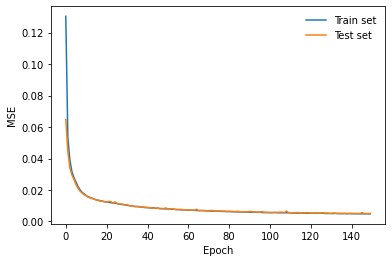

In [17]:
plt.plot(history.history['loss'], label = 'Train set')
plt.plot(history.history['val_loss'], label = 'Test set')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(frameon=False)

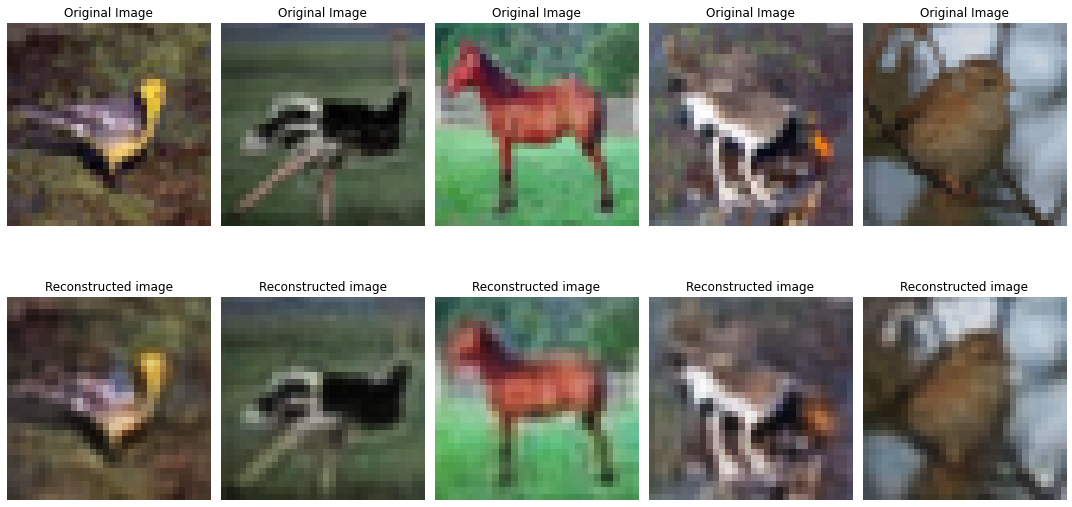

In [18]:
fig, axes = plt.subplots(2,5, figsize=(15,15))

for i in range(5):
    ix = np.random.choice(len(X3c_normelized))
    reconstruct_image = autoencoder.predict(X3c_normelized[ix:ix+1,...])[0]
    axes[1,i].imshow( (1+reconstruct_image) /2 )
    axes[1,i].axis('off')
    axes[1,i].set_title('Reconstructed image')
    axes[0,i].imshow((X3c_normelized[ix:ix+1,...][0]+ 1) /2)
    axes[0,i].axis('off')
    axes[0,i].set_title('Original Image')
fig.tight_layout(h_pad=-30)

Looking over the loss value, along with the images themselves, exhibits that the autoencoder provides sufficient results. That means that the encoding procedure provides enough information, which is compressed into 512 dimensions,  to reconstruct the image during the decoding path.

Now, we can apply clustering techniques over these 512 dimensions, which represent the compressed image's information.

In [19]:
X3c_encoded = encoder.predict(X3c_normelized)
print("X3c_encoded dims:", np.shape(X3c_encoded))

X3c_encoded dims: (18000, 512)


#### 2.2.1) K-Means Method + Autoencoder

In [63]:
kmeansAuto  = KMeans(n_clusters = 3,verbose = 1, max_iter=500, tol=0.000001)
# Train the model:
kmeansAuto.fit(X3c_encoded) 

Initialization complete
Iteration 0, inertia 4311628.5
Iteration 1, inertia 2766311.0
Iteration 2, inertia 2729773.25
Iteration 3, inertia 2719738.25
Iteration 4, inertia 2714378.0
Iteration 5, inertia 2710721.5
Iteration 6, inertia 2708218.0
Iteration 7, inertia 2706650.0
Iteration 8, inertia 2705613.75
Iteration 9, inertia 2705018.0
Iteration 10, inertia 2704566.75
Iteration 11, inertia 2704236.75
Iteration 12, inertia 2703941.0
Iteration 13, inertia 2703732.0
Iteration 14, inertia 2703602.25
Iteration 15, inertia 2703499.25
Iteration 16, inertia 2703448.25
Iteration 17, inertia 2703408.0
Iteration 18, inertia 2703382.5
Iteration 19, inertia 2703363.5
Iteration 20, inertia 2703355.0
Iteration 21, inertia 2703341.5
Iteration 22, inertia 2703331.25
Iteration 23, inertia 2703319.75
Iteration 24, inertia 2703319.0
Iteration 25, inertia 2703315.5
Iteration 26, inertia 2703321.0
Iteration 27, inertia 2703313.0
Iteration 28, inertia 2703309.75
Iteration 29, inertia 2703309.0
Iteration 30, i

Initialization complete
Iteration 0, inertia 3479424.75
Iteration 1, inertia 2747347.75
Iteration 2, inertia 2721063.75
Iteration 3, inertia 2713255.5
Iteration 4, inertia 2709597.0
Iteration 5, inertia 2707557.0
Iteration 6, inertia 2706147.75
Iteration 7, inertia 2705273.25
Iteration 8, inertia 2704628.5
Iteration 9, inertia 2704189.75
Iteration 10, inertia 2703913.5
Iteration 11, inertia 2703720.25
Iteration 12, inertia 2703604.5
Iteration 13, inertia 2703552.0
Iteration 14, inertia 2703516.0
Iteration 15, inertia 2703469.5
Iteration 16, inertia 2703436.5
Iteration 17, inertia 2703404.0
Iteration 18, inertia 2703374.5
Iteration 19, inertia 2703364.25
Iteration 20, inertia 2703348.5
Iteration 21, inertia 2703348.0
Iteration 22, inertia 2703334.25
Iteration 23, inertia 2703337.0
Iteration 24, inertia 2703329.5
Iteration 25, inertia 2703329.75
Iteration 26, inertia 2703320.25
Iteration 27, inertia 2703313.5
Iteration 28, inertia 2703312.5
Iteration 29, inertia 2703311.25
Iteration 30, 

KMeans(max_iter=500, n_clusters=3, tol=1e-06, verbose=1)

In [64]:

Y_clustered_Auto = kmeansAuto.labels_

# Silhouette Score (The average of all the points)
#Close to 1 -> Good assignment of a point to its cluster
#Close to 0 -> Assignment of a point to the borderline of two clusters
#Close to -1 -> Bad assignment of a point to its cluster

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", metrics.silhouette_score(X3c_encoded, Y_clustered_Auto)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_encoded, Y_clustered_Auto)) 


Silhouette Score (mean Silhouette Coefficient over all samples):  0.08407438
Davies-Bounding index:  2.7308129834697024


In [65]:
np.unique(Y_clustered_Auto)

array([0, 1, 2])

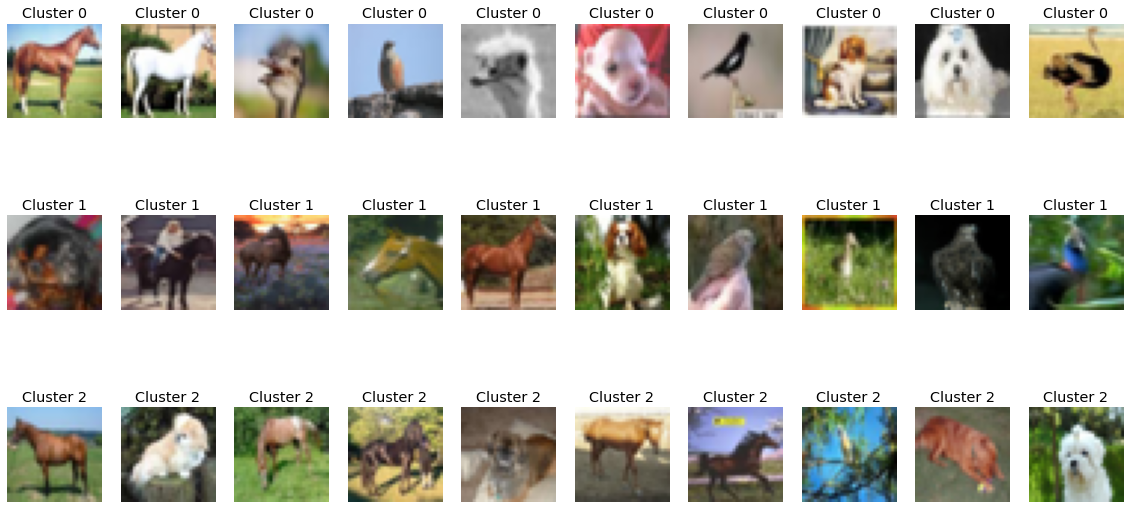

In [66]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c_normelized[Y_clustered_Auto  == i]
    X_class = (X_class+1)/2
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

In [67]:
X3c = 0.5*(X3c_normelized+1)*255
lab0 = color.rgb2lab(X3c_normelized[Y_clustered_Auto == 0])
lab1 = color.rgb2lab(X3c_normelized[Y_clustered_Auto == 1])
lab2 = color.rgb2lab(X3c_normelized[Y_clustered_Auto == 2])

print("Average lightness of cluster 0: ","Average Value: ",np.round(np.mean(lab0[:,:,:,0])),
      " Min Value: ", np.round(np.min(np.mean(lab0[:,:,:,0], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(lab0[:,:,:,0], axis = 0))),", Num of images in the set: ", len(lab0[:,:,:,0]),
      "\n#Birds:" , sum(Y3c[Y_clustered_Auto ==0]==0)," #Dog:" , sum(Y3c[Y_clustered_Auto ==0]==1) , " #horse:", sum(Y3c[Y_clustered_Auto ==0]==2),
"\nAverage lightness of cluster 1: ", "Average Value: ", np.round(np.mean(lab1[:,:,:,0])),
      " Min Value: " ,np.round(np.min(np.mean(lab1[:,:,:,0], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(lab1[:,:,:,0], axis = 0))), ", Num of images in the set: ", len(lab1[:,:,:,0]),
      "\n#Birds:" , sum(Y3c[Y_clustered_Auto ==1]==0)," #Dog:" , sum(Y3c[Y_clustered_Auto ==1]==1) , " #horse:", sum(Y3c[Y_clustered_Auto ==1]==2),
"\nAverage lightness of cluster 2: ", "Average Value: " ,np.round(np.mean(lab2[:,:,:,0]))
      ," Min Value: ", np.round(np.min(np.mean(lab2[:,:,:,0], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(lab2[:,:,:,0], axis = 0))), ", Num of images in the set: ", len(lab2[:,:,:,0]),
     "\n#Birds:" , sum(Y3c[Y_clustered_Auto ==2]==0)," #Dog:" , sum(Y3c[Y_clustered_Auto ==2]==1) , " #horse:", sum(Y3c[Y_clustered_Auto ==2]==2))

Average lightness of cluster 0:  Average Value:  34.0  Min Value:  5.0 Max Value:  51.0 , Num of images in the set:  3574 
#Birds: 1414  #Dog: 1116  #horse: 1044 
Average lightness of cluster 1:  Average Value:  -20.0  Min Value:  -30.0 Max Value:  -7.0 , Num of images in the set:  4454 
#Birds: 1586  #Dog: 1630  #horse: 1238 
Average lightness of cluster 2:  Average Value:  4.0  Min Value:  -5.0 Max Value:  12.0 , Num of images in the set:  9972 
#Birds: 3000  #Dog: 3254  #horse: 3718


Let's check if there is a priority to some class (animal) in each cluster. 


In [80]:
print("Cluster 0: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (1414/3574*100,1116/3574*100,1044/3574*100))
print("Cluster 1: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (1586/4454*100,1630/4454*100,1238/4454*100))
print("Cluster 2: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (3000/9972*100,3254/9972*100,3718/9972*100))

Cluster 0: Birds - 39.6%, Dog - 31.2%, horse - 29.2%
Cluster 1: Birds - 35.6%, Dog - 36.6%, horse - 27.8%
Cluster 2: Birds - 30.1%, Dog - 32.6%, horse - 37.3%


In [ ]:
As we can see, similar to KMeans withput PCA, PCA-KMeans also provide clustering based on image properties.
There is no priority of 

#### 2.2.1) Hierarchical Clustering (HC) Method + AutoEncoder

In [68]:
hcAuto = AgglomerativeClustering(n_clusters=3 ,affinity= 'euclidean') #Hierarchical Clustering

# Train the model:
hcAuto.fit(X3c_encoded)
Y_hc_Auto = hcAuto.labels_
print(np.unique(Y_hc_Auto))


[0 1 2]


In [69]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_encoded,Y_hc_Auto)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_encoded, Y_hc_Auto)) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.07185539
Davies-Bounding index:  2.611661126200041


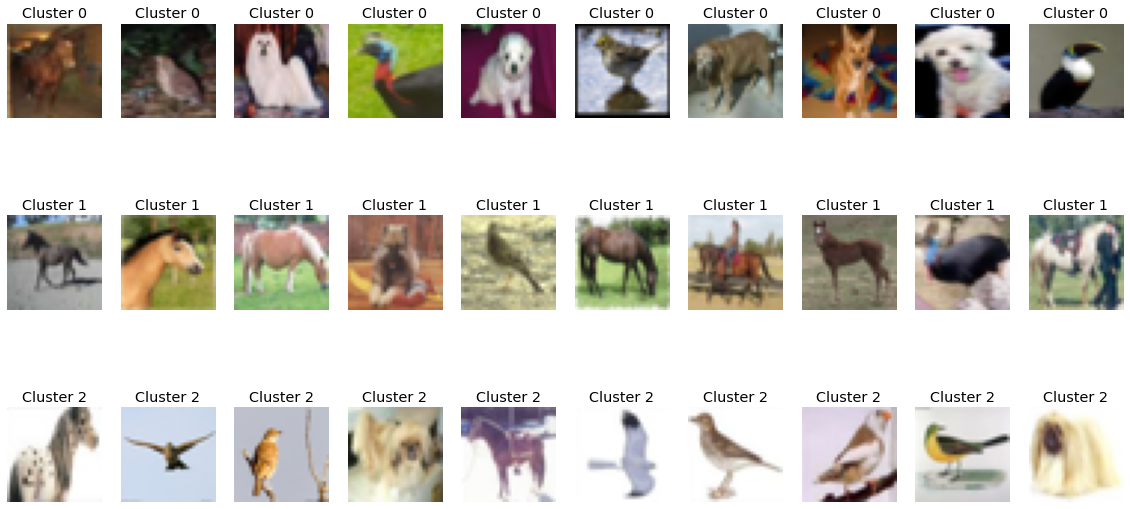

In [70]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c_normelized[Y_hc_Auto  == i]
    X_class = (X_class+1)/2
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

In [71]:

g0 = rgb2gray(X3c[ Y_hc_Auto == 0])
g1 = rgb2gray(X3c[ Y_hc_Auto == 1])
g2 = rgb2gray(X3c[ Y_hc_Auto == 2])
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(g0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(g0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(g0[:,:,:], axis = 0))),", Num of images in the set: ", len(g0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_hc_Auto==0]==0)," #Dog:" , sum(Y3c[Y_hc_Auto==0]==1) , " #horse:", sum(Y3c[Y_hc_Auto==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(g1[:,:,:])),
      " Min Value: " ,np.round(np.min(np.mean(g1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(g1[:,:,:], axis = 0))), ", Num of images in the set: ", len(g1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_hc_Auto==1]==0)," #Dog:" , sum(Y3c[Y_hc_Auto==1]==1) , " #horse:", sum(Y3c[Y_hc_Auto==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(g2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(g2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(g2[:,:,:], axis = 0))), ", Num of images in the set: ", len(g2[:,:,:]),
     "\n#Birds:" , sum(Y3c[Y_hc_Auto==2]==0)," #Dog:" , sum(Y3c[Y_hc_Auto==2]==1) , " #horse:", sum(Y3c[Y_hc_Auto==2]==2))

Average brightness of cluster 0:  Average Value:  101.0  Min Value:  84.0 Max Value:  115.0 , Num of images in the set:  8299 
#Birds: 2761  #Dog: 3213  #horse: 2325 
Average brightness of cluster 1:  Average Value:  136.0  Min Value:  108.0 Max Value:  158.0 , Num of images in the set:  9066 
#Birds: 2902  #Dog: 2603  #horse: 3561 
Average brightness of cluster 2:  Average Value:  193.0  Min Value:  129.0 Max Value:  219.0 , Num of images in the set:  635 
#Birds: 337  #Dog: 184  #horse: 114


In [81]:
print("Cluster 0: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (2761/8299*100,3213/8299*100,2325/8299*100))
print("Cluster 1: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (2902/9066*100,2603/9066*100,3561/9066*100))
print("Cluster 2: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (337/635*100,184/635*100,114/635*100))

Cluster 0: Birds - 33.3%, Dog - 38.7%, horse - 28.0%
Cluster 1: Birds - 32.0%, Dog - 28.7%, horse - 39.3%
Cluster 2: Birds - 53.1%, Dog - 29.0%, horse - 18.0%


#### 2.1.3) Gaussians Mixture (GM) Method  + Auto

In [72]:

gmAuto = mixture.GaussianMixture(n_components= 3, covariance_type='full', tol=0.001, reg_covar=1e-06,
                                    max_iter=100, n_init=1, init_params='kmeans',
                                    verbose= 1, verbose_interval=10)

gmAuto.fit(X3c_encoded)

Y_gmAuto = gmAuto.predict(X3c_encoded)
print(np.unique(Y_gmAuto))


Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
[0 1 2]


In [73]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_encoded,Y_gmAuto)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_encoded, Y_gmAuto )) 

Silhouette Score (mean Silhouette Coefficient over all samples):  -0.02187967
Davies-Bounding index:  10.951589422992663


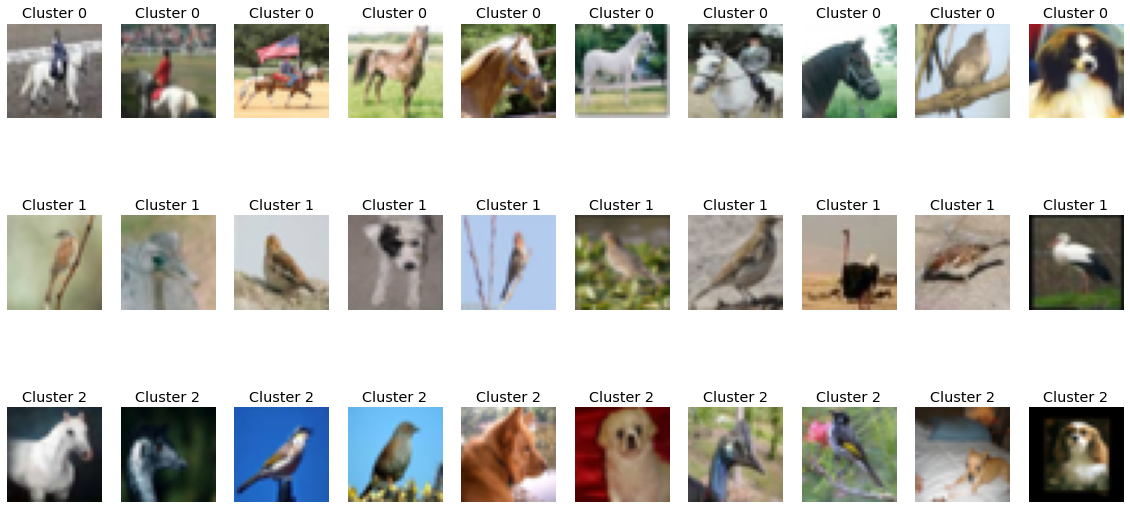

In [74]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c_normelized[Y_gmAuto   == i]
    X_class = (X_class+1)/2
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

In [75]:
gm0 = rgb2gray(X3c[ Y_gmAuto == 0])
gm1 = rgb2gray(X3c[ Y_gmAuto == 1])
gm2 = rgb2gray(X3c[ Y_gmAuto == 2])
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(gm0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(gm0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm0[:,:,:], axis = 0))),", Num of images in the set: ", len(gm0[:,:,:]),
      "\n#Birds:" , sum(Y3c[ Y_gmAuto==0]==0)," #Dog:" , sum(Y3c[ Y_gmAuto==0]==1) , " #horse:", sum(Y3c[ Y_gmAuto==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(gm1[:,:,:])),
      
      " Min Value: " ,np.round(np.min(np.mean(gm1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(gm1[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm1[:,:,:]),
      "\n#Birds:" , sum(Y3c[ Y_gmAuto==1]==0)," #Dog:" , sum(Y3c[ Y_gmAuto==1]==1) , " #horse:", sum(Y3c[ Y_gmAuto==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(gm2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(gm2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm2[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm2[:,:,:]),
     "\n#Birds:" , sum(Y3c[ Y_gmAuto==2]==0)," #Dog:" , sum(Y3c[ Y_gmAuto==2]==1) , " #horse:", sum(Y3c[ Y_gmAuto==2]==2))

Average brightness of cluster 0:  Average Value:  130.0  Min Value:  107.0 Max Value:  148.0 , Num of images in the set:  8291 
#Birds: 1437  #Dog: 2468  #horse: 4386 
Average brightness of cluster 1:  Average Value:  127.0  Min Value:  113.0 Max Value:  134.0 , Num of images in the set:  5681 
#Birds: 3113  #Dog: 1681  #horse: 887 
Average brightness of cluster 2:  Average Value:  98.0  Min Value:  80.0 Max Value:  116.0 , Num of images in the set:  4028 
#Birds: 1450  #Dog: 1851  #horse: 727


In [82]:
print("Cluster 0: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (1437/8291*100,2468/8291*100,4386/8291*100))
print("Cluster 1: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (3113/5681*100,1681/5681*100,887/5681*100))
print("Cluster 2: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (1450/4028*100,1851/4028*100,727/4028*100))

Cluster 0: Birds - 17.3%, Dog - 29.8%, horse - 52.9%
Cluster 1: Birds - 54.8%, Dog - 29.6%, horse - 15.6%
Cluster 2: Birds - 36.0%, Dog - 46.0%, horse - 18.0%


Here we can see that the integration of Autoencoder followed by GM method for clustering, yields a clustering that takes into account the object in the image as one of its main clustering features. As presented, clusters 1, 2, and 3, contain around 50% of the objects horse, birds, and dogs, respectively. 

#### 2.3) TSNE followed by all three clusstering methods 

In [23]:
# building the encoder model
from sklearn.utils import shuffle
import tensorflow as tf

X3c_normelized = 2 * (X3c / 255.0) - 1 ## normelized the data to -1 .... +1 , shape (None, 32,32,3)

inputs_encoder = tf.keras.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(16, (3,3), strides=(1, 1), padding='SAME',activation=tf.nn.relu)(inputs_encoder) # 32x32x3 --> 16x16x16
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(9, (3,3), strides=(1, 1), padding='SAME',activation=tf.nn.relu)(x) # 16x16x16 --> 8x8x32
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(6, (3,3), strides=(1, 1), padding='SAME',activation=tf.nn.relu)(x) # 8 x 8 x 32 --> 4x4x64
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(3, (3,3), strides=(1, 1), padding='SAME',activation=tf.nn.relu)(x) # 8 x 8 x 32 --> 4x4x64
x_encoded = tf.keras.layers.MaxPool2D()(x)

encoder = tf.keras.models.Model(inputs_encoder, x_encoded)
encoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 9)         1305      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 9)           0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 6)           492       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 6)           0  

In [24]:

## Decoder
layers = [0]*4
layers[0] = tf.keras.layers.Conv2DTranspose(6, kernel_size=(3,3),strides=(2,2), padding = 'SAME', activation = tf.nn.relu)
layers[1]  = tf.keras.layers.Conv2DTranspose(9, kernel_size=(3,3),strides=(2,2), padding = 'SAME', activation = tf.nn.relu)
layers[2]  = tf.keras.layers.Conv2DTranspose(16, kernel_size=(3,3),strides=(2,2), padding = 'SAME', activation = tf.nn.relu)
layers[3]  = tf.keras.layers.Conv2DTranspose(3, kernel_size=(3,3),strides=(2,2), padding = 'SAME', activation = tf.nn.relu)


inputs_decoder = tf.keras.Input(shape = (2,2,3))# 512
x = layers[0](inputs_decoder)
x = layers[1](x)
x = layers[2](x)
prediction = layers[3](x)

decoder = tf.keras.Model(inputs = inputs_decoder, outputs = prediction)


## The Autoencoder


x = layers[0](x_encoded)
x = layers[1](x)
x = layers[2](x)
Y_hat = layers[3](x)



In [25]:
decoder.summary()


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 2, 2, 3)]         0         
_________________________________________________________________
conv2d_transpose_26 (Conv2DT (None, 4, 4, 6)           168       
_________________________________________________________________
conv2d_transpose_27 (Conv2DT (None, 8, 8, 9)           495       
_________________________________________________________________
conv2d_transpose_28 (Conv2DT (None, 16, 16, 16)        1312      
_________________________________________________________________
conv2d_transpose_29 (Conv2DT (None, 32, 32, 3)         435       
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


In [26]:

autoencoder = tf.keras.Model(inputs =inputs_encoder, outputs = Y_hat)

autoencoder.summary()


Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 9)         1305      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 9)           0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 6)           492       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 6)           0  

In [28]:
# The training will be applied on the full (autoencoder) model only:
optimizer = tf.keras.optimizers.Adam(lr = 0.001)
autoencoder.compile(optimizer = optimizer, loss = 'MSE')#'binary_crossentropy')

In [29]:
n = int(len(X3c_normelized) * 0.8)
X3c_normelized, Y3c = shuffle(X3c_normelized, Y3c)
x_train = X3c_normelized[:n,...]
x_test = X3c_normelized[n:,...]
history = autoencoder.fit(x_train, x_train,
                epochs=150, 
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 14400 samples, validate on 3600 samples
Epoch 1/150
14400/14400 [==============================] - 7s 482us/sample - loss: 0.2306 - val_loss: 0.2147
Epoch 2/150
14400/14400 [==============================] - 3s 203us/sample - loss: 0.2040 - val_loss: 0.1992
Epoch 3/150
14400/14400 [==============================] - 3s 202us/sample - loss: 0.1941 - val_loss: 0.1936
Epoch 4/150
14400/14400 [==============================] - 3s 202us/sample - loss: 0.1900 - val_loss: 0.1907
Epoch 5/150
14400/14400 [==============================] - 3s 201us/sample - loss: 0.1877 - val_loss: 0.1887
Epoch 6/150
14400/14400 [==============================] - 3s 202us/sample - loss: 0.1860 - val_loss: 0.1874
Epoch 7/150
14400/14400 [==============================] - 3s 203us/sample - loss: 0.1850 - val_loss: 0.1868
Epoch 8/150
14400/14400 [==============================] - 3s 204us/sample - loss: 0.1845 - val_loss: 0.1858
Epoch 9/150
14400/14400 [==============================] - 3s 204us/sample - lo

14400/14400 [==============================] - 3s 201us/sample - loss: 0.1807 - val_loss: 0.1826
Epoch 76/150
14400/14400 [==============================] - 3s 200us/sample - loss: 0.1807 - val_loss: 0.1825
Epoch 77/150
14400/14400 [==============================] - 3s 202us/sample - loss: 0.1807 - val_loss: 0.1825
Epoch 78/150
14400/14400 [==============================] - 3s 202us/sample - loss: 0.1807 - val_loss: 0.1826
Epoch 79/150
14400/14400 [==============================] - 3s 200us/sample - loss: 0.1807 - val_loss: 0.1826
Epoch 80/150
14400/14400 [==============================] - 3s 200us/sample - loss: 0.1807 - val_loss: 0.1825
Epoch 81/150
14400/14400 [==============================] - 3s 202us/sample - loss: 0.1807 - val_loss: 0.1824
Epoch 82/150
14400/14400 [==============================] - 3s 202us/sample - loss: 0.1807 - val_loss: 0.1824
Epoch 83/150
14400/14400 [==============================] - 3s 202us/sample - loss: 0.1806 - val_loss: 0.1824
Epoch 84/150
14400/1440

14400/14400 [==============================] - 3s 200us/sample - loss: 0.1802 - val_loss: 0.1819
Epoch 150/150
14400/14400 [==============================] - 3s 200us/sample - loss: 0.1802 - val_loss: 0.1820


In [33]:
n,w,h,c = X3c_normelized.shape


In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random')

In [38]:
X3c_encoded = encoder(X3c_normelized)
n,w,h,c  = X3c_encoded.shape
print(n,w,h,c )

18000 2 2 3


In [39]:

X3c_encoded= np.reshape(X3c_encoded, (n,w*h*c))
X3c_transformed_normelized =X3c_encoded # X3c_normelized.reshape(len(X3c),32*32*3) # normelized to -1....1
#X3c_transformed_normelized = np.concatenate((np.random.normal(0,size = (100,3)),
 #                                             np.random.normal(10,size = (100,3)),
  #                                             np.random.normal(20,size = (100,3))
   #                                         ),axis = 0)
                                            

In [40]:
X3c_transformed_normelized.shape

(18000, 12)

In [41]:
X3c_normelized_tsne = tsne.fit_transform(X3c_transformed_normelized)

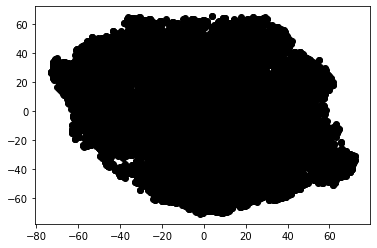

In [42]:
X3c_normelized_tsne.shape
plt.scatter(X3c_normelized_tsne[:,0], X3c_normelized_tsne[:,1], color = 'k')

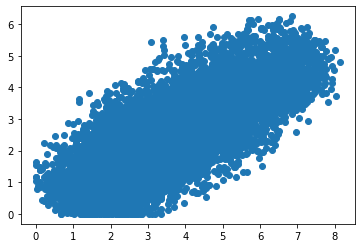

In [43]:
plt.scatter(X3c_transformed_normelized[:,0], X3c_transformed_normelized[:,1])

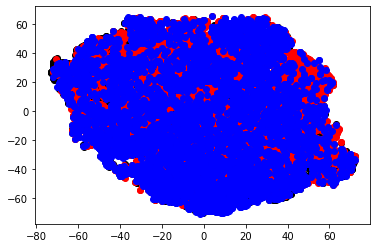

In [44]:
plt.scatter(X3c_normelized_tsne[:,0][Y3c == 0], X3c_normelized_tsne[:,1][Y3c == 0], color = 'k')
plt.scatter(X3c_normelized_tsne[:,0][Y3c == 1], X3c_normelized_tsne[:,1][Y3c == 1], color = 'r')
plt.scatter(X3c_normelized_tsne[:,0][Y3c == 2], X3c_normelized_tsne[:,1][Y3c == 2], color = 'b')

### 2.2) TSNE - Data Visualization 

## Project Summary 